In [1]:
# Digit classification is a classic problem in machine learning.
# In this, a neural network is tasked at recognizing digits from 
# a dataset of 8x8 greyscale images.
# 
# Digital root classification is another classic problem, though
# somewhat less well known. In this task, the neural network must
# recognize the digital roots of a 64-bit integer.
#
# In this notebook, we explore the joint task "digital classification"
# using the MNIST database for labelled digit images, and the 
# FEMINIST database for labelled 64-bit integers.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

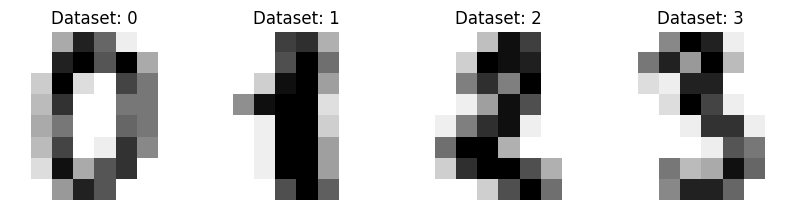

In [2]:
# We fetch the digits dataset. This will be altered to train the neural
# network for digital classification. Thanks, MNIST!
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Dataset: %i" % label)

In [3]:
# We initialize the digital roots dataset. Thanks, FEMINIST!
bits = np.load("bits", allow_pickle=True)
roots = np.load("roots", allow_pickle=True)

for i in range(4):
    print(f"Number:\n{bits[i]}\nDigital root:\n\t{roots[i]}")

Number:
[False False False False False False  True False False  True False  True
 False False False False  True  True  True  True  True  True False  True
  True False  True  True  True False False False  True  True False False
  True False  True False  True  True  True  True  True  True  True False
  True  True  True  True False  True False False False  True False  True
 False False  True  True]
Digital root:
	9
Number:
[ True  True  True  True  True  True False  True  True False  True False
  True  True False False False False  True False False False False  True
  True False False False False  True  True  True False False False False
 False  True False  True  True  True  True False False  True  True False
  True False False False  True  True False  True  True  True  True False
  True  True False False]
Digital root:
	5
Number:
[ True False False  True  True False  True  True False  True False False
  True False  True False  True False False  True  True False False False
  True  True F

In [4]:
# We interleave the digital root dataset into the 
# least significant bit of the digits dataset.
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
altered = data // 2 * 2 + bits

clf = svm.SVC(gamma=0.001)

# Let's train with 80% training data, and 20% testing.
X_train, X_test, y_train, y_test = train_test_split(
    altered, roots, test_size=0.80, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

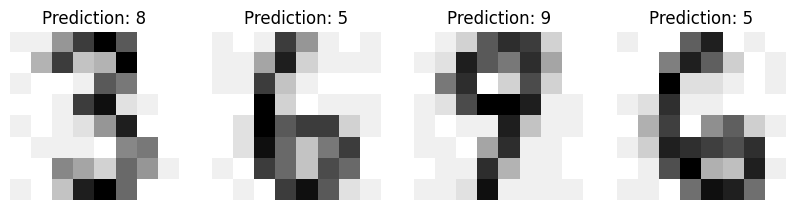

In [5]:
# Observe the model's predictions!
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [6]:
# Let's assess the precision of the model on the dataset!
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           1       0.13      0.07      0.09       176
           2       0.00      0.00      0.00       163
           3       0.09      0.12      0.10       167
           4       0.10      0.07      0.09       152
           5       0.13      0.18      0.15       176
           6       0.12      0.15      0.13       137
           7       0.12      0.06      0.08       162
           8       0.10      0.31      0.15       154
           9       0.12      0.04      0.06       151

    accuracy                           0.11      1438
   macro avg       0.10      0.11      0.09      1438
weighted avg       0.10      0.11      0.09      1438




Confusion matrix:
[[13  0 27 13 37 20  5 55  6]
 [ 6  0 24 15 26 14  8 61  9]
 [13  1 20  9 25 21 13 59  6]
 [12  1 20 11 29 20  5 50  4]
 [15  1 28 12 32 16  9 57  6]
 [ 9  0 21  9 23 20  8 43  4]
 [ 9  0 36  8 23 24  9 45  8]
 [12  0 15 18 26 23 12 47  1]
 [11  1 23 11 32 15  6 46  6]]


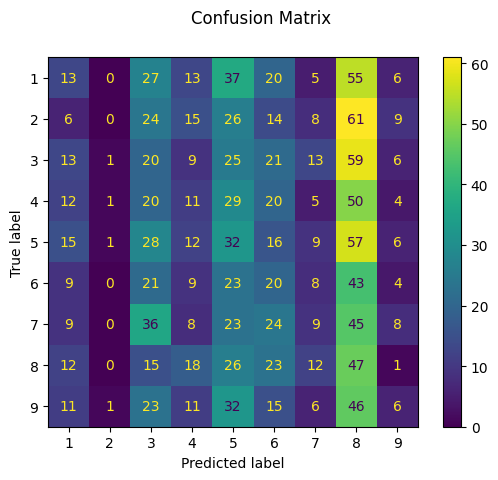

In [7]:
# O-oh. That's, uh, not very good. That's not good at all.
# That's actually equivalent to random guessing.
# Hold on, what is the model actually doing?
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [8]:
# What on earth are you doing? This isn't what you're supposed to do!
# You were supposed to classify digital roots! This is just the
# same distribution with little influence from the input!
#
# Gosh, what now?
# Maybe the least significant bit is not significant enough. Let's
# put that bit somewhere else, then???
altered2 = data // 4 * 4 + 2 * bits + data % 2

clf2 = svm.SVC(gamma=0.001)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    altered2, roots, test_size=0.80, shuffle=False
)
clf2.fit(X_train2, y_train2)
predicted2 = clf2.predict(X_test2)


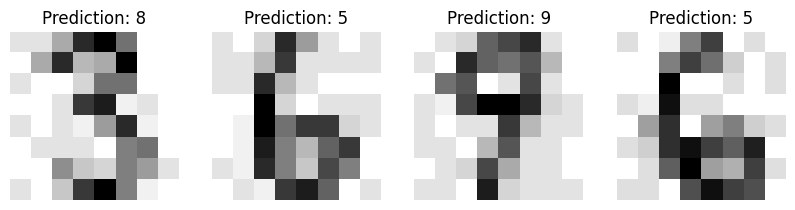

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test2, predicted2):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [10]:
# Show me what's wrong this time!
print(
    f"Classification report for classifier {clf2}:\n"
    f"{metrics.classification_report(y_test2, predicted2)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           1       0.13      0.06      0.08       176
           2       0.00      0.00      0.00       163
           3       0.10      0.14      0.11       167
           4       0.14      0.09      0.11       152
           5       0.12      0.17      0.14       176
           6       0.11      0.13      0.12       137
           7       0.12      0.06      0.08       162
           8       0.11      0.32      0.16       154
           9       0.10      0.04      0.06       151

    accuracy                           0.11      1438
   macro avg       0.10      0.11      0.10      1438
weighted avg       0.10      0.11      0.09      1438




In [11]:
# Aaaaaaaaaaaaaaaaaargh
# But I read through the tutorial! This is supposed to work!
# Sure, this data is totally unfit for machine learning, but
# it should work because neural networks are supposed to learn!
# 
# Maybe it just needs a different kind of model? Yeah! 
# Let's pick some other thing from the, whew, staggeringly
# long list of technical sounding terms on sklearn's website!
from sklearn import ensemble
clf3 = ensemble.RandomForestClassifier(n_estimators=40)

bitbits = bits.astype(bool)

# Hoping for the best this time...
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    bitbits, roots, test_size=0.80, shuffle=False
)

clf3.fit(X_train3, y_train3)
predicted3 = clf3.predict(X_test3)

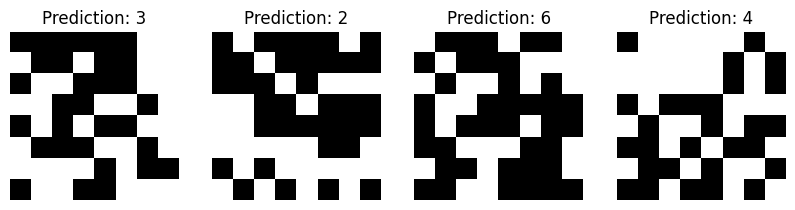

In [12]:
# Pretty please?
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test3, predicted3):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [13]:
# Not sure yet...
print(
    f"Classification report for classifier {clf3}:\n"
    f"{metrics.classification_report(y_test3, predicted3)}\n"
)

Classification report for classifier RandomForestClassifier(n_estimators=40):
              precision    recall  f1-score   support

           1       0.12      0.10      0.11       176
           2       0.15      0.13      0.14       163
           3       0.12      0.17      0.14       167
           4       0.08      0.11      0.09       152
           5       0.14      0.12      0.13       176
           6       0.10      0.12      0.10       137
           7       0.17      0.10      0.13       162
           8       0.13      0.19      0.16       154
           9       0.13      0.09      0.10       151

    accuracy                           0.12      1438
   macro avg       0.13      0.12      0.12      1438
weighted avg       0.13      0.12      0.12      1438




Confusion matrix:
[[17 16 31 24 21 14 11 30 12]
 [21 21 26 21 10 18  9 26 11]
 [14 22 29 19 11 23 14 29  6]
 [11 17 27 16 18 16 12 20 15]
 [22 14 21 31 21 19  7 30 11]
 [17  8 23 23 17 16  4 18 11]
 [ 8 10 32 23 19 21 16 21 12]
 [10 21 25 14 16 17 11 30 10]
 [17  8 21 24 12 24  8 24 13]]


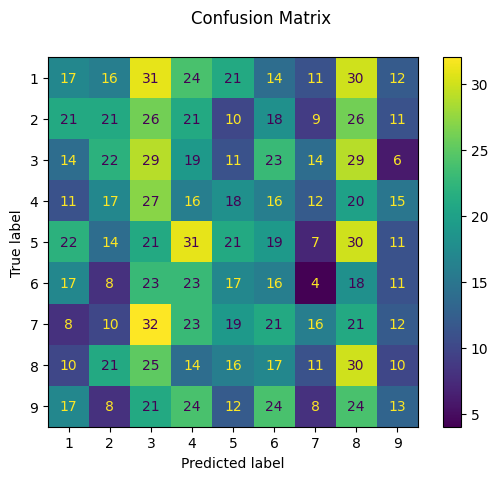

In [14]:
# Whyyyyyyyyyy this is not good at alllllllllllllllll
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test3, predicted3)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
# Ugh, fine. Maybe what this needs is more data. 
# 
# Yeah, more data. That's a good idea. Let's do that.
# How do we get more data? FEMINIST only had that dataset.
# 
# Hmm... Maybe we can generate our own data? Sure, that's
# totally normal. Yeah let's do that.
def entry(n):
    while n > 9:
        n = sum(map(int, str(n)))
    return n

# What's a good number of data points? A million?
import random
n_points = 1_000_000
numbers = [random.randint(0, (1 << 64) - 1) for _ in range(1_000_000)]

b_iii_iiits = np.array([np.array(list(np.binary_repr(n, width = 64))) == '1' for n in numbers])
r_ooo_ooots = np.array([entry(n) for n in numbers])

In [16]:
# Maybe this is enough data? It took more than a second to generate after all.
for i in range(4):
    print(f"Number:\n{b_iii_iiits[i]}\nDigital root:\n\t{r_ooo_ooots[i]}")

Number:
[False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True  True False False False False
 False  True  True  True False  True False False False False  True False
  True False  True  True  True False False False  True False False False
  True  True  True  True False False  True False False  True  True  True
 False False False False]
Digital root:
	8
Number:
[ True  True False False  True  True  True  True False False  True False
 False  True  True False False False  True  True False  True False  True
 False False False False  True  True False False  True False False  True
  True  True  True  True False False  True False  True False False  True
  True False False  True False False False False False False False  True
 False  True  True  True]
Digital root:
	8
Number:
[False  True False False False False  True  True False  True False  True
 False False  True False False False  True  True False  True False False
  True False  

In [17]:
# Here we go......
clf4 = ensemble.RandomForestClassifier(n_estimators=100)
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    b_iii_iiits, r_ooo_ooots, test_size=0.80, shuffle=False
)
clf4.fit(X_train4, y_train4)
predicted4 = clf4.predict(X_test4)

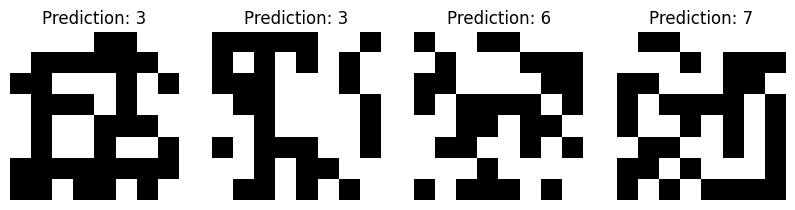

In [18]:
# That took a long time to train... Hoping for the best...
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test4, predicted4):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [19]:
# Please, don't make me cry...
print(
    f"Classification report for classifier {clf4}:\n"
    f"{metrics.classification_report(y_test4, predicted4)}\n"
)

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           1       0.11      0.13      0.12     88971
           2       0.11      0.13      0.12     88817
           3       0.11      0.12      0.11     88477
           4       0.11      0.11      0.11     89325
           5       0.11      0.11      0.11     88920
           6       0.11      0.10      0.11     89476
           7       0.11      0.10      0.11     88919
           8       0.11      0.09      0.10     88459
           9       0.11      0.10      0.10     88636

    accuracy                           0.11    800000
   macro avg       0.11      0.11      0.11    800000
weighted avg       0.11      0.11      0.11    800000




Confusion matrix:
[[11906 11394 10342 10054  9862  9169  9208  8436  8600]
 [11942 11197 10480 10021  9662  9341  9345  8430  8399]
 [12050 11126 10388  9938  9949  8949  9385  8350  8342]
 [12114 11257 10549 10157  9694  9101  9228  8476  8749]
 [12156 11241 10399  9943  9813  9204  9136  8427  8601]
 [12061 11460 10328 10131  9887  9370  9104  8456  8679]
 [11989 11425 10210  9914  9899  9148  9229  8346  8759]
 [11808 11331 10458  9950  9777  9106  9149  8382  8498]
 [11948 11202 10539  9916  9790  9116  9164  8275  8686]]


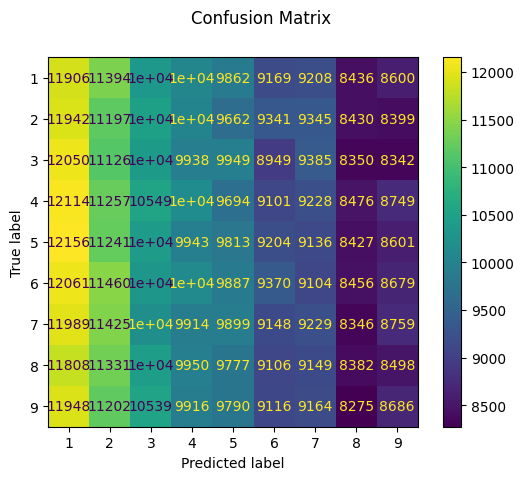

In [20]:
# OMG, 0.11 ACCURACY!!!!!!!!!!!!!!!!!!!
# THAT'S BETTER THAN RANDOM GUESSING!!!
# I'm so happyyyyyyy
#
# But, uh, what is it actually doing
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test4, predicted4)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [21]:
# I'm celebrating so much! This data definitely doesn't 
# demonstrate a massive flaw in the training data. It means
# that my neural network learned! Yippeeeee!!!
print("yous tryly, sans undertale")

yous tryly, sans undertale
